In [27]:
import plotly.graph_objects as go # We are only importing the 'graph_objects' module from plotly here
import pandas as pd
import numpy as np 
import plotly.io as pio
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3439 sha256=25d72ce4b42e111c9489a2fd90400f83e6c9d72bcb6a615fee2d831360352e9c
  Stored in directory: c:\users\isha2\appdata\local\pip\cache\wheels\f8\84\15\465a1c7eabab8605e82621b7aa658c99010f3564a43ccd06aa
Successfully built sort-dataframeby-monthorweek


You should consider upgrading via the 'C:\Users\isha2\anaconda3\python.exe -m pip install --upgrade pip' command.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3240 sha256=89674016f3d28e21bd6e4d5d7921b71f07d63eb2ec376d31ea09e8a34eab223e
  Stored in directory: c:\users\isha2\appdata\local\pip\cache\wheels\9a\0d\2e\309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays


You should consider upgrading via the 'C:\Users\isha2\anaconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
df = pd.read_csv('hotel_bookings.csv')

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [13]:
# .columns method shows the list of all column names in the dataframe df

df.columns

'''The dataset has 119390 rows and 32 columns:
hotel: The names of the hotel are City Hotel and Resort Hotel
is_canceled: Boolean value stored as int64, indicates the hotel is canceled or not
lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
arrival_date: Information of the arrival date
stay in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
stay in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
adults/ children/ babies: Number of adults/ children/ babies
meal: Type of meal booked. Categories:

Undefined/SC – no meal package
BB – Bed & Breakfast
HB – Half board (breakfast and one other meal – usually dinner)
FB – Full board (breakfast, lunch and dinner)
country: Country of origin
market_segment: Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators"
distribution_channel: Booking distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators"
is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)'''

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
df["children"] = df["children"].fillna(0)
df["country"] = df["country"].fillna("Undefined")
df["agent"] = df["agent"].fillna(0)
df["company"] = df["company"].fillna(0)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [42]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,No,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,No,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,No,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,No,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,No,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,No,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [43]:
print ('Hotel                :', df.hotel.unique())
print ('\nYear                 :', df.arrival_date_year.unique())
print ('\nMonth                :',df.arrival_date_month.unique())
print ('\nMeal                 :', df.meal.unique())
print ('\nCountry              :', df.country.unique())
print ('\nMarket Segment       :', df.market_segment.unique())
print ('\nDistribution Channel :', df.distribution_channel.unique())
print ('\nReserved Room Type   :', df.reserved_room_type.unique())
print ('\nAssigned Room Type   :', df.assigned_room_type.unique())
print ('\nDeposit Type         :', df.deposit_type.unique())
print ('\nCustomer Type        :', df.customer_type.unique())
print ('\nReservation Status   :', df.reservation_status.unique())

Hotel                : ['Resort Hotel' 'City Hotel']

Year                 : [2015 2016 2017]

Month                : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Meal                 : ['BB' 'FB' 'HB' 'SC' 'Undefined']

Country              : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Undefined' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 

In [44]:
df["is_canceled"] = df["is_canceled"].replace({1:"Yes", 0:"No"})
df["is_repeated_guest"] = df["is_repeated_guest"].replace({1:"Yes", 0:"No"})
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,No,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,No,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [45]:
country_wise_guests = df[df['is_canceled'] == 'No']['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,AIA,1
162,PYF,1
163,MRT,1
164,MAC,1


In [46]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [66]:
#with kids and without kids traveeling ratio

guest_no_kids =df[(df['children'] == 0) & (df['babies'] == 0)]['hotel'].value_counts().reset_index()
guest_no_kids.columns = ['hotel' , 'guest with no kids']
guest_with_kids =df[(df['children'] != 0) | (df['babies'] != 0)]['hotel'].value_counts().reset_index()
guest_with_kids.columns = ['hotel' , 'guest with kids']

guest_without_kid = dict(type='bar',
                    x=guest_no_kids['hotel'],
                    y=guest_no_kids['guest with no kids'], 
                    name='Without kids guest'
                   )

guest_with_kid = dict(type='bar',
                    x=guest_with_kids['hotel'],
                    y=guest_with_kids['guest with kids'], 
                    name='With kids guest'
                   )
guests_kids = [guest_without_kid , guest_with_kid]

resort_layout =dict(title=dict(text='reservation guests with and without kids'),
                 yaxis=dict(title='guest count'),
                 xaxis=dict(title='hotel type'),
                 barmode='overlay' # It is in the layout that we define the barmode to stacked, by default is as 'group'
                                    # try any of these 'stack', 'group', 'overlay', 'relative'
                 )

resort_fig = go.Figure(data=guests_kids, layout=resort_layout)
resort_fig.show()

In [79]:
no_children_month = df[(df['children'] == 0) & (df['babies'] == 0)].groupby(['arrival_date_month'], as_index=False).size()

no_children_month.rename(columns={"arrival_date_month": "month", "size": "number_of_guest"}, inplace=True)

no_children_month=sort_month(no_children_month, 'month')
no_children_month

#no_children_month

children_month = df[(df['children'] != 0) | (df['babies'] != 0)].groupby(['arrival_date_month'], as_index=False).size()

children_month.rename(columns={"arrival_date_month": "month", "size": "number_of_guest"}, inplace=True)
children_month=sort_month(children_month, 'month')
children_month
#children_month

,month,number_of_guest
0,January,343
1,February,608
2,March,536
3,April,819
4,May,621
5,June,778
6,July,1702
7,August,2097
8,September,464
9,October,534


In [88]:
children_month_trace1 = dict(type='scatter',
                  x=children_month['month'],
                  y=children_month['number_of_guest'],
                  name='guest with kids'
                  )

no_children_month_trace2 = dict(type='scatter',
                  x=no_children_month['month'],
                  y=no_children_month['number_of_guest'],
                  name='guest with no kids'
                  )

ex2_data = [children_month_trace1, no_children_month_trace2]


ex2_layout = dict(title=dict(text='favrito month to travel with kids and without kids '),
                  xaxis=dict(title='Months'),
                  yaxis=dict(title='no of guest')
                  )

ex2_fig = go.Figure(data=ex2_data, layout=ex2_layout)

ex2_fig.show(renderer='iframe')

In [94]:
guest_no_kids =  df[df['children'] != 0  | (df['babies'] != 0)]['arrival_date_month'].value_counts().reset_index()
guest_no_kids.columns = ['month', 'guest with no kids']
guest_no_kids = sort_month(guest_no_kids, 'month')
guest_no_kids

,month,guest with no kids
0,January,334
1,February,596
2,March,532
3,April,809
4,May,614
5,June,767
6,July,1673
7,August,2062
8,September,454
9,October,528


In [95]:
data = dict(type='bar', 
            x=guest_no_kids['month'],
            y=guest_no_kids['guest with no kids']
           )

layout = dict(title=dict(text= 'monthly reservstion with kids'),
              xaxis=dict(title='month'),
              yaxis=dict(title='guest with kids')
             )

clear_figure = go.Figure(data=data,
                        layout=layout)
clear_figure.show()

In [49]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [50]:
#df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_resort = df[(df['hotel'] == 'Resort Hotel')]
#data_resort
data_resort_no_kids =data_resort[(data_resort['children'] == 0) & (data_resort['babies'] == 0)]['arrival_date_month'].value_counts().reset_index()
#data_resort_no_kids
data_resort_with_kids =data_resort[(data_resort['children'] != 0) | (data_resort['babies'] != 0)]['arrival_date_month'].value_counts().reset_index()
data_resort_final = data_resort_no_kids.merge(data_resort_with_kids , on = 'index' )
data_resort_final.columns = ['month' , 'without kids' , 'with kids']
data_resort_final=sort_month(data_resort_final, 'month')
data_resort_final


#final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
#final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']

,month,without kids,with kids
0,January,2082,109
1,February,2877,225
2,March,3144,190
3,April,3350,259
4,May,3286,273
5,June,2694,350
6,July,3757,816
7,August,3897,997
8,September,2908,200
9,October,3345,208


In [51]:
resort_without_kid = dict(type='bar',
                    x=data_resort_final['month'],
                    y=data_resort_final['without kids'], 
                    name='Without kids guest'
                   )

resort_with_kid = dict(type='bar',
                    x=data_resort_final['month'],
                    y=data_resort_final['with kids'], 
                    name='With kids guest'
                   )
resort_data_kids = [resort_without_kid , resort_with_kid]

resort_layout =dict(title=dict(text='resort guests with and without kids'),
                 yaxis=dict(title='guest count'),
                 xaxis=dict(title='month'),
                 barmode='overlay' # It is in the layout that we define the barmode to stacked, by default is as 'group'
                                    # try any of these 'stack', 'group', 'overlay', 'relative'
                 )

resort_fig = go.Figure(data=resort_data_kids, layout=resort_layout)
resort_fig.show()


#need to present % wise and can add column for city hotel also 

In [84]:
data_hotel = df[(df['hotel'] == 'City Hotel')]
#data_hotel
data_hotel_no_kids =data_hotel[data_hotel['children'] == 0 & (data_hotel['babies'] == 0)]['arrival_date_month'].value_counts().reset_index()
#data_hotel_no_kids
data_hotel_with_kids =data_hotel[data_hotel['children'] != 0 | (data_hotel['babies'] != 0)]['arrival_date_month'].value_counts().reset_index()
data_hotel_final = data_hotel_no_kids.merge(data_hotel_with_kids , on = 'index' )
data_hotel_final.columns = ['month' , 'with no kids' , 'with kids']
data_hotel_final = sort_month(data_hotel_final, 'month')
data_hotel_final

,month,with no kids,with kids
0,January,3511,230
1,February,4589,377
2,March,6113,343
3,April,6927,555
4,May,7890,348
5,June,7483,427
6,July,7209,877
7,August,7910,1086
8,September,7163,259
9,October,7291,324


In [86]:
hotel_without_kid = dict(type='scatter',
                    x=data_hotel_final['month'],
                    y=data_hotel_final['with no kids'], 
                    name='Without kids guest'
                   )

hotel_with_kid = dict(type='scatter',
                    x=data_hotel_final['month'],
                    y=data_hotel_final['with kids'], 
                    name='With kids guest'
                   )
hotel_data_kids = [hotel_without_kid , hotel_with_kid]

hotel_layout =dict(title=dict(text='city hotel guests with and without kids'),
                 yaxis=dict(title='guest count'),
                 xaxis=dict(title='month'),
                 barmode='relative' # It is in the layout that we define the barmode to stacked, by default is as 'group'
                                    # try any of these 'stack', 'group', 'overlay', 'relative'
                 )

hotel_fig = go.Figure(data=hotel_data_kids, layout=hotel_layout)
hotel_fig.show()


In [54]:
#meal_selection with and with out kids (meal selection , with kids or without kids)

meal_withOut_kids = df[(df['children'] == 0) & (df['babies'] == 0)]['meal'].value_counts().reset_index()
meal_withOut_kids.columns = ['Meal selection' ,'guest without kids' ]


meal_with_kids = df[(df['children'] != 0) | (df['babies'] != 0)]['meal'].value_counts().reset_index()
meal_with_kids.columns = ['Meal selection' ,'guest with kids' ]

'''Undefined/SC – no meal package
BB – Bed & Breakfast
HB – Half board (breakfast and one other meal – usually dinner)
FB – Full board (breakfast, lunch and dinner)'''

In [55]:
meal_withOut_kids

,Meal selection,guest without kids
0,BB,84626
1,HB,13069
2,SC,10357
3,Undefined,1112
4,FB,714


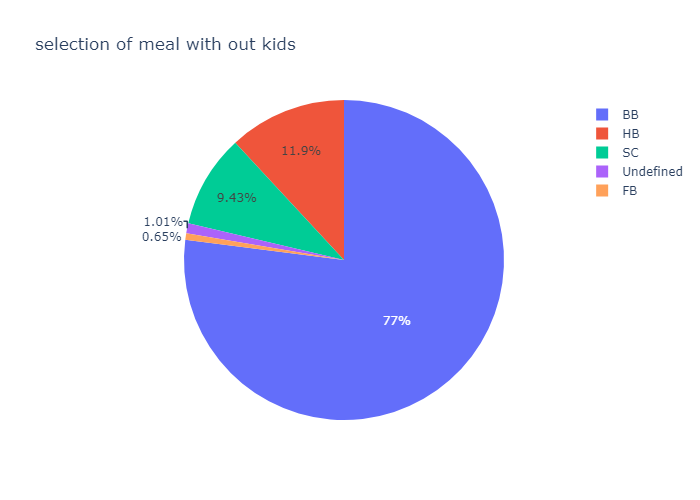

In [56]:
labels_1 = meal_withOut_kids['Meal selection']

#Sum of all Emissions for each continent
values_1 = meal_withOut_kids['guest without kids']

data_8 = dict(type='pie', labels=labels_1, values=values_1)

layout_8 = dict(title=dict(text='selection of meal with out kids'))

fig_8 = go.Figure(data=[data_8], layout=layout_8)

fig_8.show(renderer='png')

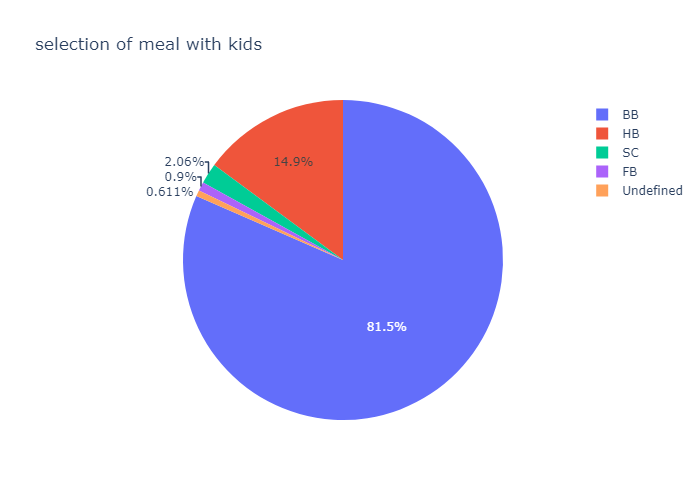

In [57]:
labels_w = meal_with_kids['Meal selection']

#Sum of all Emissions for each continent
values_w = meal_with_kids['guest with kids']

data_w = dict(type='pie', labels=labels_w, values=values_w)

layout_w = dict(title=dict(text='selection of meal with kids'))

fig_w = go.Figure(data=[data_w], layout=layout_w)

fig_w.show(renderer='png')

In [87]:
# parking space ,week days or week ends,  room type, advance booking
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [110]:
no_children_weekday = df[(df['children'] == 0) & (df['babies'] == 0)].groupby(['stays_in_week_nights'], as_index=False).size()

no_children_weekday.columns= ['stays_in_week_nights' , 'number_of_guest']
no_children_weekday
#no_children_month=sort_month(no_children_month, 'month')
#no_children_month

#no_children_month

children_weekday = df[(df['children'] != 0) | (df['babies'] != 0)].groupby(['stays_in_week_nights'], as_index=False).size()

children_weekday.rename(columns={"stays_in_week_nights": "weekdays", "size": "number_of_guest"}, inplace=True)
children_weekday
#children_month=sort_month(children_month, 'month')
#children_month
#children_month

weekday_without_kid = dict(type='bar',
                    x=no_children_weekday['stays_in_week_nights'],
                    y=no_children_weekday['number_of_guest'], 
                    name='Without kids guest'
                   )

weekday_with_kid = dict(type='bar',
                    x=children_weekday['weekdays'],
                    y=children_weekday['number_of_guest'], 
                    name='With kids guest'
                   )
weeksdays_data_kids = [weekday_without_kid , weekday_with_kid]

weekdays_layout =dict(title=dict(text='weekdays reservation with and without kids'),
                 yaxis=dict(title='guest count'),
                 xaxis=dict(title='weekdays'),
                 barmode='relative' # It is in the layout that we define the barmode to stacked, by default is as 'group'
                                    # try any of these 'stack', 'group', 'overlay', 'relative'
                 )

hotel_fig = go.Figure(data=weeksdays_data_kids, layout=weekdays_layout)
hotel_fig.show()

In [121]:
no_children_weekday = df[(df['children'] == 0) & (df['babies'] == 0) & (df['stays_in_week_nights'] != 0)].groupby(['stays_in_week_nights'], as_index=False).size()

no_children_weekday.columns= ['stays_in_week_nights' , 'number_of_guest']
no_children_weekday
#no_children_month=sort_month(no_children_month, 'month')
#no_children_month

#no_children_month

no_children_weekend = df[(df['children'] == 0) & (df['babies'] == 0) & (df['stays_in_weekend_nights'] ==0)].groupby(['stays_in_weekend_nights'], as_index=False).size()

no_children_weekend.rename(columns={"stays_in_weekend_nights": "weekend", "size": "number_of_guest"}, inplace=True)
no_children_weekend
#children_month=sort_month(children_month, 'month')
#children_month
#children_month

weekday_without_kid = dict(type='bar',
                    x=no_children_weekday['stays_in_week_nights'],
                    y=no_children_weekday['number_of_guest'], 
                    name='Without kids guest weekday'
                   )

weekend_without_kid = dict(type='bar',
                    x=no_children_weekend['weekend'],
                    y=no_children_weekend['number_of_guest'], 
                    name='Without kids guest weekend'
                   )
weeks_data_kids = [weekday_without_kid , weekend_without_kid]

weeks_layout =dict(title=dict(text='weekdays and weekend reservation without kids'),
                 yaxis=dict(title='guest count'),
                 xaxis=dict(title='weekdays and weekend'),
                 barmode='group' # It is in the layout that we define the barmode to stacked, by default is as 'group'
                                    # try any of these 'stack', 'group', 'overlay', 'relative'
                 )

hotel_fig = go.Figure(data=weeks_data_kids, layout=weeks_layout)
hotel_fig.show()